In [5]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy, deepcopy 

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Pacejka52 as pa52
i=10000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

Fz = 4000

params_ice = [4 ,2 ,0.1 ,1]
params_snow = [5, 2, 0.3, 1]
params_wet = [12, 2.3,0.82, 1]
params_dry = [10,1.9,1,0.97]

s=0.1

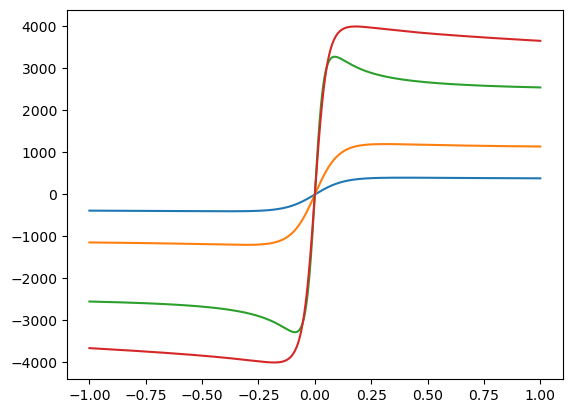

In [6]:
Fx_ice = pa52.Pacejka5_long_pa(Sx,Fz,*params_ice)
Fx_snow = pa52.Pacejka5_long_pa(Sx,Fz,*params_snow)
Fx_wet = pa52.Pacejka5_long_pa(Sx,Fz,*params_wet)
Fx_dry = pa52.Pacejka5_long_pa(Sx,Fz,*params_dry)
plt.plot(Sx,Fx_ice, label =  'Eis')
plt.plot(Sx,Fx_snow, label =  'Schnee')
plt.plot(Sx,Fx_wet, label =  'nass')
plt.plot(Sx,Fx_dry, label =  'trocken')

In [7]:
def Fx_intervall(Fx,Fx_intv): #Fz in [kN], Fx_intv in % (z.b 10% von Fx_max)
#x Position von Fx_max berechnene
    w=len(Fx)
    Fx_max_pos=0
    for j in range(0,w):
        if Fx[j] == np.max(Fx):
            break
        else:
            Fx_max_pos = Fx_max_pos + 1

    #cut slop
    cut = int(w/2)
    Fx_w_pos = Fx[cut::]
    Fx_w_pos_max=Fx_w_pos[0:((Fx_max_pos-cut)+1)] #von 0 bis Fx_max
    Fx_w_max_end=Fx_w_pos[((Fx_max_pos-cut)+1)::] #von Fx_max bis Ende(+100% slipratio)

    Fx_max_ref = np.max(Fx) * Fx_intv #Referenzwert Fx 10% weniger als Fx_max

    left=0
    j=0
    for j in range(0,len(Fx_w_pos_max)):
        if Fx_w_pos_max[j] < Fx_max_ref:
            left +=1
        else:
            break
        
    right = 0
    j=0
    for j in range(0,len(Fx_w_max_end)):
        if Fx_w_max_end[j] > Fx_max_ref:
            right +=1
        else:
            break
        
#Intervall 10% abweichung von Fx_max = [left,right]
    Fx_max_10=Fx[cut+left:cut+len(Fx_w_pos_max)+right]
    Fx_slope_b=((len(Fx_w_pos_max)+right)-left)/(cut/100) #breite des Intervalls in %Schlupf
    
    return Fx_slope_b,Fx_max_10,cut,left,right,Fx_w_pos_max

def diff_func(y,SL): #y = Funktion die abgleitet werden soll, Sl = linspace
    dx = SL[1]-SL[0]
    dydx = np.gradient(y, dx)
    
    return dydx
    
def slope_func(y,Sx):
    a = int(len(Sx)/2) + 1
    slope = diff_func(y,Sx)[a]
    return slope

Text(0.5, 1.0, 'Anfangssteigung, Parameter +10% ')

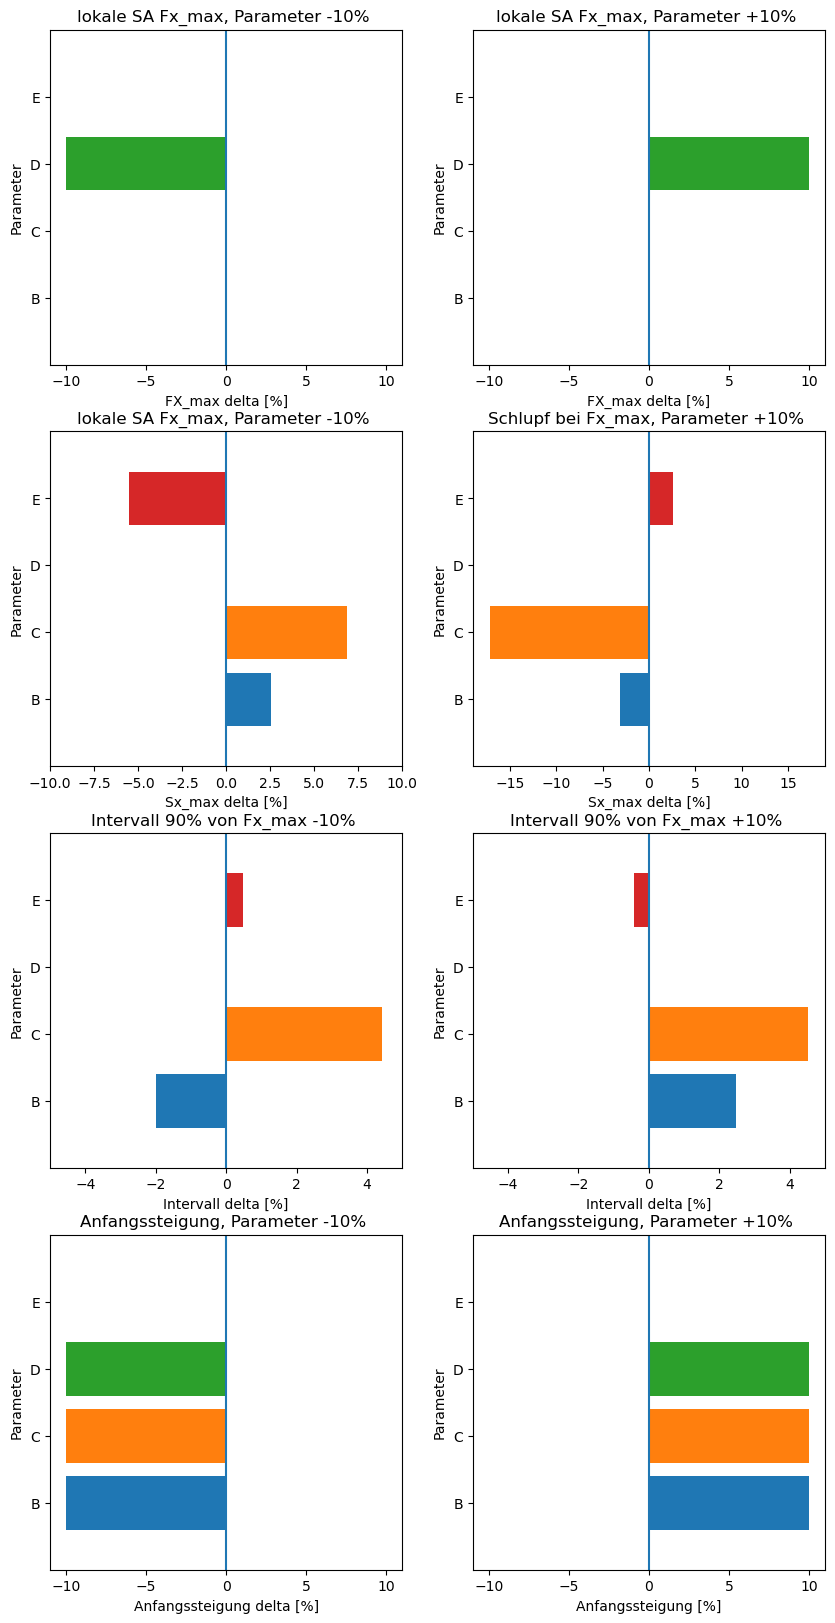

In [8]:
#Fx_max

params = deepcopy(params_ice)

params_Set = np.zeros(len(params_ice))
params_pos = params_ice
params_neg = params_ice
delta=np.zeros([len(params_ice),2])
i=0
for i in range(0,len(params_ice)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = ((np.max(pa52.Pacejka5_long_pa(Sx,Fz,*params))) - np.max(pa52.Pacejka5_long_pa(Sx,Fz,*params_pos)))/np.max(pa52.Pacejka5_long_pa(Sx,Fz,*params))
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = ((np.max(pa52.Pacejka5_long_pa(Sx,Fz,*params))) - np.max(pa52.Pacejka5_long_pa(Sx,Fz,*params_neg)))/np.max(pa52.Pacejka5_long_pa(Sx,Fz,*params))
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%
fig, ax = plt.subplots(4,2, figsize=(10,20))

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax[0,0].barh(y_pos[i],delta_pos[i])
ax[0,0].set_yticks(y_pos, labels=y_axis)
ax[0,0].set_xlim(-11,11)
ax[0,0].set_ylim(-1,len(y_axis))
ax[0,0].axvline(0, 0, 1)
ax[0,0].set_xlabel("FX_max delta [%]")
ax[0,0].set_ylabel("Parameter")
ax[0,0].set_title('lokale SA Fx_max, Parameter -10% ')

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax[0,1].barh(y_pos[i],delta_neg[i])
ax[0,1].set_yticks(y_pos, labels=y_axis)
ax[0,1].set_xlim(-11,11)
ax[0,1].set_ylim(-1,len(y_axis))
ax[0,1].axvline(0, 0, 1)
ax[0,1].set_xlabel("FX_max delta [%]")
ax[0,1].set_ylabel("Parameter")
ax[0,1].set_title('lokale SA Fx_max, Parameter +10% ')

##########################################################################################################################################

#Schlupf bei Fx_max

params = deepcopy(params_ice)

params_Set = np.zeros(len(params_ice))
params_pos = params_ice
params_neg = params_ice
delta=np.zeros([len(params_ice),2])
i=0
for i in range(0,len(params_ice)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = ((np.argmax(pa52.Pacejka5_long_pa(Sx,Fz,*params))) - np.argmax(pa52.Pacejka5_long_pa(Sx,Fz,*params_pos)))/np.argmax(pa52.Pacejka5_long_pa(Sx,Fz,*params))
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = ((np.argmax(pa52.Pacejka5_long_pa(Sx,Fz,*params))) - np.argmax(pa52.Pacejka5_long_pa(Sx,Fz,*params_neg)))/np.argmax(pa52.Pacejka5_long_pa(Sx,Fz,*params))
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax[1,0].barh(y_pos[i],delta_pos[i])
ax[1,0].set_yticks(y_pos, labels=y_axis)
ax[1,0].set_xlim(-10,10)
ax[1,0].set_ylim(-1,len(y_axis))
ax[1,0].axvline(0, 0, 1)
ax[1,0].set_xlabel("Sx_max delta [%]")
ax[1,0].set_ylabel("Parameter")
ax[1,0].set_title('lokale SA Fx_max, Parameter -10% ')

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax[1,1].barh(y_pos[i],delta_neg[i])
ax[1,1].set_yticks(y_pos, labels=y_axis)
ax[1,1].set_xlim(-19,19)
ax[1,1].set_ylim(-1,len(y_axis))
ax[1,1].axvline(0, 0, 1)
ax[1,1].set_xlabel("Sx_max delta [%]")
ax[1,1].set_ylabel("Parameter")
ax[1,1].set_title('Schlupf bei Fx_max, Parameter +10% ')

##########################################################################################################################################

#Intervall 90% von Fx_max

params = deepcopy(params_ice)

params_Set = np.zeros(len(params_ice))
params_pos = params_ice
params_neg = params_ice
delta=np.zeros([len(params_ice),2])
i=0
for i in range(0,len(params_ice)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = (Fx_intervall(pa52.Pacejka5_long_pa(Sx,Fz,*params),0.9)[0] - Fx_intervall(pa52.Pacejka5_long_pa(Sx,Fz,*params_pos),0.9)[0])/Fx_intervall(pa52.Pacejka5_long_pa(Sx,Fz,*params),0.9)[0]
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = (Fx_intervall(pa52.Pacejka5_long_pa(Sx,Fz,*params),0.9)[0] - Fx_intervall(pa52.Pacejka5_long_pa(Sx,Fz,*params_neg),0.9)[0])/Fx_intervall(pa52.Pacejka5_long_pa(Sx,Fz,*params),0.9)[0]
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]

i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax[2,0].barh(y_pos[i],delta_pos[i])
ax[2,0].set_yticks(y_pos, labels=y_axis)
ax[2,0].set_xlim(-5,5)
ax[2,0].set_ylim(-1,len(y_axis))
ax[2,0].axvline(0, 0, 1)
ax[2,0].set_xlabel("Intervall delta [%]")
ax[2,0].set_ylabel("Parameter")
ax[2,0].set_title('Intervall 90% von Fx_max -10% ')

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax[2,1].barh(y_pos[i],delta_neg[i])
ax[2,1].set_yticks(y_pos, labels=y_axis)
ax[2,1].set_xlim(-5,5)
ax[2,1].set_ylim(-1,len(y_axis))
ax[2,1].axvline(0, 0, 1)
ax[2,1].set_xlabel("Intervall delta [%]")
ax[2,1].set_ylabel("Parameter")
ax[2,1].set_title('Intervall 90% von Fx_max +10% ')

##########################################################################################################################################

#Fx_max

params = deepcopy(params_ice)

params_Set = np.zeros(len(params_ice))
params_pos = params_ice
params_neg = params_ice
delta=np.zeros([len(params_ice),2])
i=0
for i in range(0,len(params_ice)):

    params_pos[i] = params_pos[i] * (1+s)
    delta_Fx_max_pos = ((slope_func(pa52.Pacejka5_long_pa(Sx,Fz,*params),Sx)) - slope_func(pa52.Pacejka5_long_pa(Sx,Fz,*params_pos),Sx))/slope_func(pa52.Pacejka5_long_pa(Sx,Fz,*params),Sx)
    params_pos[i] = params[i]  

    params_neg[i] = params_neg[i] * (1-s)
    delta_Fx_max_neg = ((slope_func(pa52.Pacejka5_long_pa(Sx,Fz,*params),Sx)) - slope_func(pa52.Pacejka5_long_pa(Sx,Fz,*params_neg),Sx))/slope_func(pa52.Pacejka5_long_pa(Sx,Fz,*params),Sx)
    params_neg[i] = params[i]  

    delta[i] = [delta_Fx_max_neg*100, delta_Fx_max_pos*100]


i=0
delta_neg = deepcopy(delta)
delta_pos = deepcopy(delta)
for i in range(0,len(params)):
    delta_pos[i,0] = 0

i=0
for i in range(0,len(params)):
    delta_neg[i,1] = 0


#Plots params -10%

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_pos)):
    ax[3,0].barh(y_pos[i],delta_pos[i])
ax[3,0].set_yticks(y_pos, labels=y_axis)
ax[3,0].set_xlim(-11,11)
ax[3,0].set_ylim(-1,len(y_axis))
ax[3,0].axvline(0, 0, 1)
ax[3,0].set_xlabel("Anfangssteigung delta [%]")
ax[3,0].set_ylabel("Parameter")
ax[3,0].set_title('Anfangssteigung, Parameter -10% ')

y_axis=('B', 'C', 'D', 'E')
y_pos=np.arange(len(y_axis))
i=0
for i in range(0,len(delta_neg)):
    ax[3,1].barh(y_pos[i],delta_neg[i])
ax[3,1].set_yticks(y_pos, labels=y_axis)
ax[3,1].set_xlim(-11,11)
ax[3,1].set_ylim(-1,len(y_axis))
ax[3,1].axvline(0, 0, 1)
ax[3,1].set_xlabel("Anfangssteigung [%]")
ax[3,1].set_ylabel("Parameter")
ax[3,1].set_title('Anfangssteigung, Parameter +10% ')